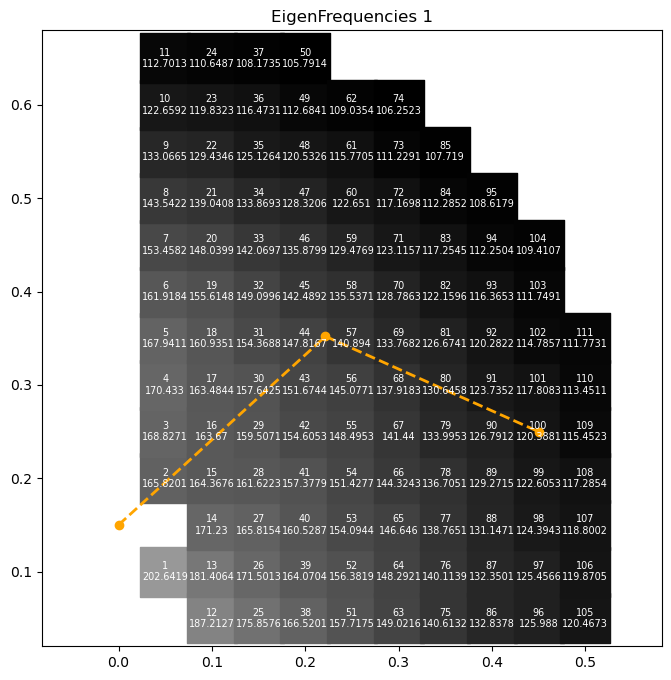

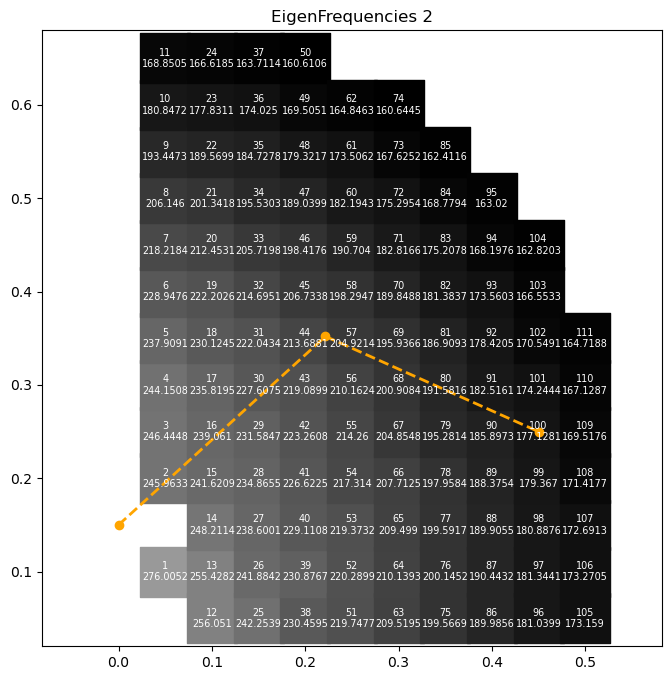

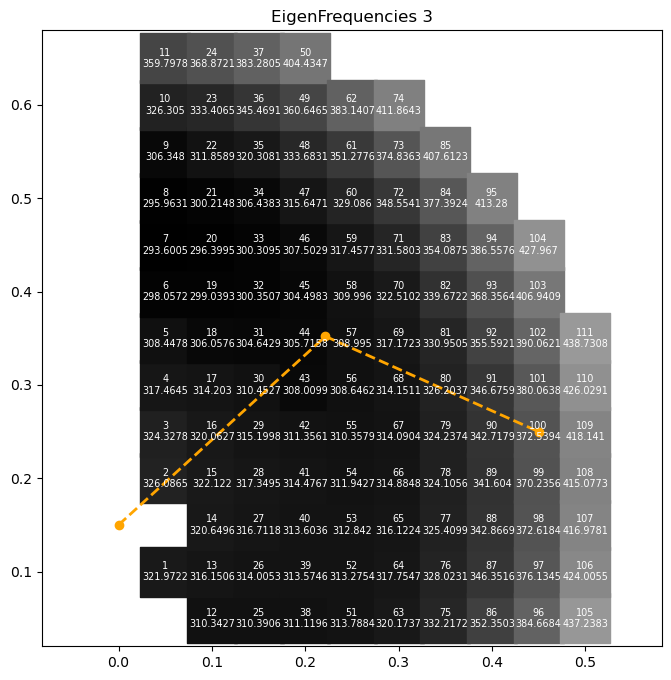

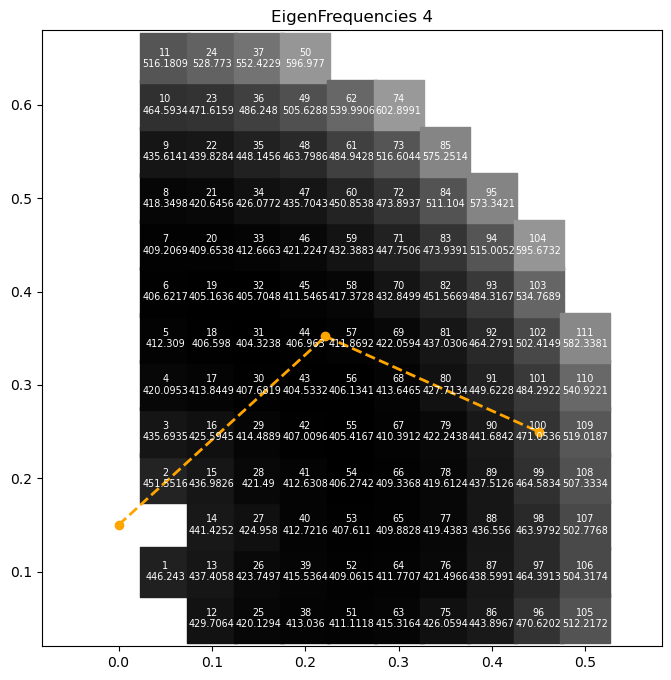

In [15]:
using CSV
using DataFrames
using PyPlot

EigenData = DataFrame!(CSV.File("EigenData.csv"));
ANGLE = DataFrame!(CSV.File("ANGLE.csv"));

# Parameters
a1 = 0.15;
a2 = 0.30;
a3 = 0.25;
cell = 0.05;
pose = 100;
PicSize = 8;

# FK
J2 = [0.00 a1;];
J3 = zeros(size(EigenData)[1],2);
for i=1:size(EigenData)[1]
    J3[i,1] = J2[1]+a2*cos(ANGLE[i,1]);
    J3[i,2] = J2[2]+a2*sin(ANGLE[i,1]);
end

# Plot
for j=1:4
    Min_EigenData = minimum(EigenData[:,j+2]);
    Max_EigenData = maximum(EigenData[:,j+2]);
    figure(figsize=(PicSize,PicSize))
    #grid("on")
    axis("equal")
    title("EigenFrequencies $j")
    for i=1:size(EigenData)[1]
        # Color
        ColorScale = Int(floor(99*(EigenData[i,j+2]-Min_EigenData)/(Max_EigenData-Min_EigenData)));
        ColorScaleString = string(ColorScale, base=10, pad=2);
        ColorCode = string("#",ColorScaleString,ColorScaleString,ColorScaleString);
        # Plot
        scatter(EigenData[i,1],EigenData[i,2],s=3200*PicSize*cell,marker="s",color=ColorCode);
        EigenFreq = EigenData[i,j+2];
        annotate("$i\n$EigenFreq", xy=(EigenData[i,1],EigenData[i,2]),ha="center",va="center",color="white",fontsize="x-small");
    end
    plot( [J2[1], J3[pose,1], EigenData[pose,1]], [J2[2], J3[pose,2], EigenData[pose,2]],color="orange",linestyle="--",linewidth=2,marker="o");
    #savefig("EigenFrequencies_$j.png")
end
